In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import csv
import openpyxl
from itertools import islice

import geojson
from shapely.geometry import Polygon, LineString
from shapely.ops import split
from shapely.geometry import Point, LineString, Polygon

# Convert QuPath Cell detection data to pandas
### 404_cell_position.txt are created thanks to QuPath script: export-annotation_geojson.groovy

In [2]:
input_file = '../Results/404_cell_position.txt'

wb = openpyxl.Workbook()
ws = wb.worksheets[0]

with open(input_file, 'r') as data:
    reader = csv.reader(data, delimiter='\t')
    for row in reader:
        ws.append(row) 

In [3]:
data = ws.values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df_404 = pd.DataFrame(data, index=idx, columns=cols)

In [4]:
df_404

,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Detection probability,Area µm^2,Length µm,Circularity,...,Hematoxylin: Mean,Hematoxylin: Median,Hematoxylin: Min,Hematoxylin: Max,Hematoxylin: Std.Dev.,DAB: Mean,DAB: Median,DAB: Min,DAB: Max,DAB: Std.Dev.
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10994.1,1579.9,0.9553,204.0999,51.3083,0.9743,...,0.4352,0.4596,0.0985,0.6285,0.1088,-0.0564,-0.065,-0.1214,0.0345,0.0307
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10338.3,1086.9,0.9483,141.9265,42.9522,0.9667,...,0.3894,0.3993,0.0851,0.7853,0.1471,-0.0271,-0.0311,-0.0993,0.0558,0.0345
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10910,1918.6,0.9421,78.139,31.9661,0.9609,...,0.3618,0.4018,0.1157,0.5214,0.1028,-0.0338,-0.0439,-0.0819,0.0481,0.0311
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10814.4,1857.8,0.9394,106.109,36.9105,0.9787,...,0.3775,0.4081,0.0821,0.5759,0.1284,-0.0219,-0.0319,-0.077,0.0661,0.035
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10864.3,860.66,0.9386,150.2629,44.0608,0.9727,...,0.3957,0.4206,0.1099,0.6633,0.1043,-0.047,-0.0589,-0.1084,0.0572,0.0359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10156,1380.9,0.4702,29.2688,19.9869,0.9207,...,0.4403,0.4262,0.2824,0.6486,0.1003,-0.0518,-0.0514,-0.0971,-0.0153,0.0195
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,11446.9,1269.3,0.4702,20.3005,19.4503,0.6743,...,0.3809,0.3806,0.2474,0.6075,0.0756,-0.0391,-0.0442,-0.0832,0.0154,0.0245
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10433.2,2023.4,0.47,23.5266,21.2471,0.6549,...,0.5055,0.4886,0.3132,0.7993,0.106,-0.0701,-0.067,-0.1213,-0.0357,0.0233
SLD_0000404.vsi - 20x_01,PathDetectionObject,,S1,Polygon,10584.6,890.43,0.47,31.5718,28.3127,0.4949,...,0.4108,0.4176,0.2208,0.6116,0.1034,-0.0454,-0.0477,-0.077,0.0031,0.0165


In [5]:
cells_centroid_x = df_404['Centroid X µm'].to_numpy(dtype=float)
cells_centroid_y = df_404['Centroid Y µm'].to_numpy(dtype=float)

# Convert QuPath S1 annotation to polygon 
## S1 data are create thanks to Quath script 

In [6]:
'''
with open('/tmp/pixel_size.txt', 'r') as f:
    pixel_size = float(f.readline())
print("pixel size:", pixel_size)
'''
pixel_size = 0.3460130331522824

In [7]:
s1_geo = geojson.load(open('../Results/S1.geojson','rb'))
s1_coordinates = np.array(s1_geo["features"][0]["geometry"]["coordinates"][0]) * pixel_size

#  analyse

In [57]:
s1_button=s1_coordinates[:,1].min()
s1_top=s1_coordinates[:,1].max()
print('button {}, top {}'.format(s1_button, s1_top))
z_length = 50 # um
nb_slice = 10

button 255.3576184663844, top 2615.858530631255


# compute fractions

In [58]:
s1_length = s1_top - s1_button
fractions=np.zeros(cells_centroid_y.shape[0], dtype=float)
for index, point in enumerate(cells_centroid_y):
    fractions[index]=(point-s1_button) / (s1_length)

# Plot positions and fraction histogram

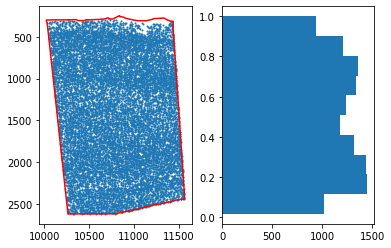

In [59]:
plt.subplot(121)
plt.gca().invert_yaxis()
plt.plot(s1_coordinates[:,0], s1_coordinates[:,1], 'r')
_ = plt.scatter(cells_centroid_x, cells_centroid_y, s=1)
plt.subplot(122)
fract_hist = plt.hist(fractions, nb_slice, orientation='horizontal')

In [60]:
nb_points_per_bin = fract_hist[0]

# Create lines to split S1

In [61]:
slice_y_length = s1_length / nb_slice
split_lines_y_coord = np.arange(s1_button + slice_y_length, s1_top, slice_y_length)

s1_x_min = 0.#s1_coordinates[:,0].min()
s1_x_max = 15000# s1_coordinates[:,0].max()
split_lines = []
for split_line_y_coord in split_lines_y_coord:
    split_lines.append(LineString([[s1_x_min-1, split_line_y_coord], [s1_x_max+1, split_line_y_coord]]))

# split S1 polygon in layers

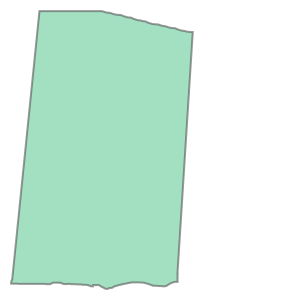

In [62]:
s1_polygon = Polygon(s1_coordinates)
s1_polygon

In [67]:
split_polygons = []
polygon_to_split = s1_polygon
for line in split_lines: 
    split_result = split(polygon_to_split, line)
    split_polygons.append(split_result[0])
    polygon_to_split = split_result[1]
    
split_polygons.append(polygon_to_split)

# Verify slices area

In [77]:
split_polygon_areas = [polygon.area for polygon in split_polygons]
total_area = sum(split_polygon_areas)
print('Recomputed area {:.2f} %'.format((total_area / s1_polygon.area) * 100))


Recomputed area 100.00 %


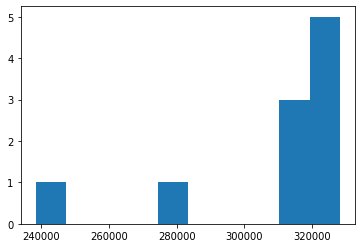

In [78]:
_= plt.hist(split_polygon_areas)

# Compute densities from fractions and volume

In [79]:
densities = nb_points_per_bin / (np.array(split_polygon_areas) * z_length)

(array([2., 0., 2., 1., 0., 1., 0., 1., 1., 2.]),
 array([7.32534317e-05, 7.47707448e-05, 7.62880579e-05, 7.78053711e-05,
        7.93226842e-05, 8.08399973e-05, 8.23573104e-05, 8.38746236e-05,
        8.53919367e-05, 8.69092498e-05, 8.84265630e-05]),
 <a list of 10 Patch objects>)

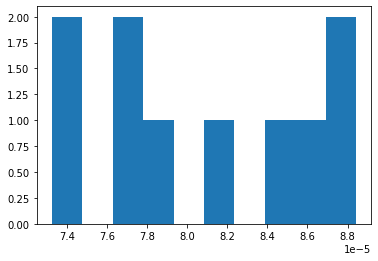

In [80]:
plt.hist(densities) # nb_cell by um3